# Model Evaluation & Fitting
## Predicting Boston Housing Prices

In [55]:
# import libraries  here
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split

## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each. 

---
## 1- Data Exploration
 

### Import and explore the data. Clean the data for outliers and missing values. 

Download the Boston dataset from [here](https://drive.google.com/file/d/1Bux3hwVYr6BuFbdUIK2db1lOY6EqghfD/view?usp=sharing) , place it in the data folder and import it as dataframe. **The features in the dataset are described [here](https://www.kaggle.com/prasadperera/the-boston-housing-dataset)** 
<br> Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict. 

In [56]:
#your code here
boston = pd.read_csv('Boston.csv')
boston.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


### Next, we want to explore the data. Pick several variables you think will be most correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.

In [57]:
#your code here
boston_numeric = boston.select_dtypes(exclude=[object])
corr = boston_numeric.corr()
corr

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
Unnamed: 0,1.000000,0.407407,-0.103393,0.399439,-0.003759,0.398736,-0.079971,0.203784,-0.302211,0.686002,0.666626,0.291074,-0.295041,0.258465,-0.226604
crim,0.407407,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.103393,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.399439,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.003759,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.398736,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.079971,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.203784,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.302211,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.686002,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626


<AxesSubplot:>

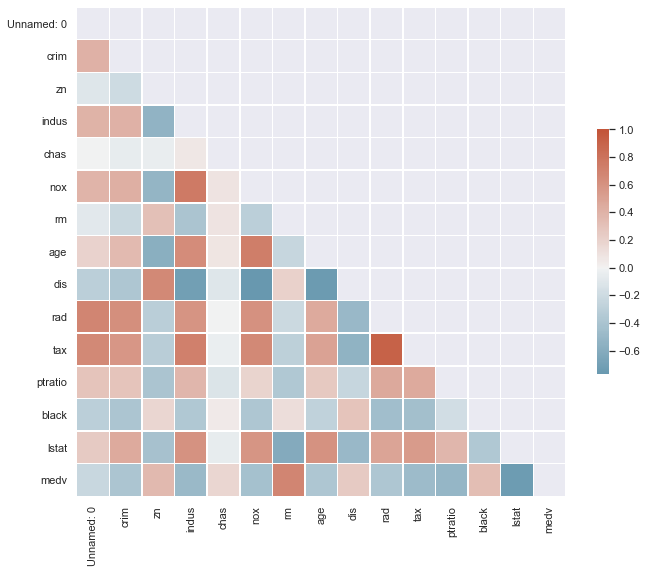

In [58]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [59]:
#paolo: nice heatmap!

C:\Users\P. Scalia\AppData\Roaming\Python\Python37\site-packages\numpy\linalg\linalg.py:1965: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff


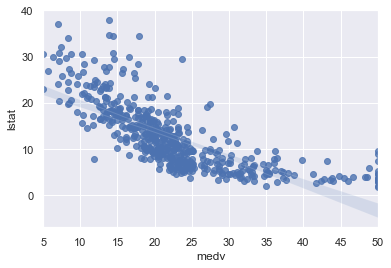

In [60]:
# Your plots here
sns.set_theme(color_codes=True)
ax = sns.regplot(x="medv", y="lstat", data=boston_numeric)

C:\Users\P. Scalia\AppData\Roaming\Python\Python37\site-packages\numpy\linalg\linalg.py:1965: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff


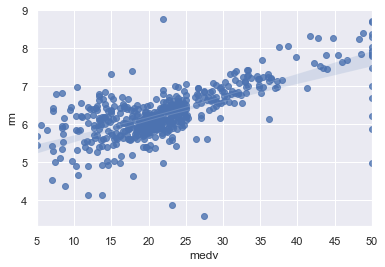

In [61]:
ax = sns.regplot(x="medv", y="rm", data=boston_numeric)

C:\Users\P. Scalia\AppData\Roaming\Python\Python37\site-packages\numpy\linalg\linalg.py:1965: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff


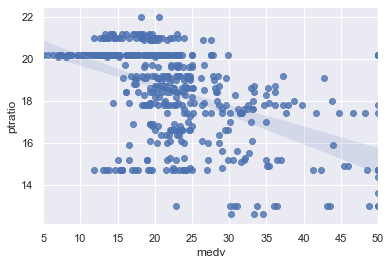

In [62]:
ax = sns.regplot(x="medv", y="ptratio", data=boston_numeric)

### What do these plots tell you about the relationships between these variables and the prices of homes in Boston? Are these the relationships you expected to see in these variables? 
- Reference: https://www.kaggle.com/c/boston-housing

In [63]:
# Your response here
"""1. Negative correlation between house prices and lstat (lower status of the population (percent)). 
So, the lower the status of the population, the lower the house prices. Makes sense.
2. Positive correlation between house prices and rm (average number of rooms per dwelling). Also something I would've 
expected: the more rooms, the more expensive a house is.
3. Negative correlation between house prices and ptratio (pupil-teacher ratio by town). The lower the pupil-teacher ratio, 
the lower house prices. I would not really expect this to be so highly correlated. The direction of the correlation (negative)
would I expect though."""

"1. Negative correlation between house prices and lstat (lower status of the population (percent)). \nSo, the lower the status of the population, the lower the house prices. Makes sense.\n2. Positive correlation between house prices and rm (average number of rooms per dwelling). Also something I would've \nexpected: the more rooms, the more expensive a house is.\n3. Negative correlation between house prices and ptratio (pupil-teacher ratio by town). The lower the pupil-teacher ratio, \nthe lower house prices. I would not really expect this to be so highly correlated. The direction of the correlation (negative)\nwould I expect though."

In [64]:
#paolo: yes,insightful comments

### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

In [65]:
#your code here
# I already made a heatmap to answer the first question, oops! 

#### Significant correlations


In [66]:
#your code here
# The ones I already listed.

### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation. 

In [67]:
# Your code here
boston['medv'].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: medv, dtype: float64

----

## 2- Developing a Model

### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test. 

In [68]:
boston.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [72]:
#your code here
y = boston['medv'] 
X = boston.drop(['medv','Unnamed: 0'], axis=1)  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

----

## 3- Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively. 

In [70]:
#your code here
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score

In [77]:
def rfr(max_depth):
    model = RandomForestRegressor(max_depth=max_depth)
    model.fit(X_train, y_train)
    
    score_train = model.score(X_train, y_train)
    
    y_pred = model.predict(X_test)
    score_test = model.score(X_test, y_pred)
    
    return (score_train, score_test)

# Test
rfr(10)
#paolo: there is an issue with score_test = model.score(X_test, y_pred)-check comments below

(0.9754055872861633, 0.8268658391872756)

In [78]:
max_depth= [2,4,6,8,10]
scores = []

for i in max_depth:
    score = rfr(i)
    scores.append(score)

print(scores)

[(0.7764919715619039, 0.6228448366455115), (0.9117494412179882, 0.8011426382134041), (0.9498395916584323, 0.8191041405356936), (0.969503144807356, 0.8253635890298641), (0.9753728826437826, 0.8292191898766239)]


Now, plot the score for each tree on the training set and on the testing set.

In [79]:
# Produce a plot with the score for the testing and training for the different max depths
#your code here
df_scores = pd.DataFrame(max_depth, columns=['max_depth'])
df_scores['scores'] = scores
df_scores[['score_train', 'score_test']] = pd.DataFrame(df_scores['scores'].tolist(), index=df_scores.index) 
df_scores = df_scores.drop(columns=['scores'])
df_scores

,max_depth,score_train,score_test
0,2,0.776492,0.622845
1,4,0.911749,0.801143
2,6,0.949840,0.819104
3,8,0.969503,0.825364
4,10,0.975373,0.829219


In [80]:
#paolo: there is something off here, very unlikely the the test score is always 1 and higher than the test train score.
#paolo: I think the issue is in  score_test = model.score(X_test, y_pred) should be  score_test = model.score(X_test, y_test)

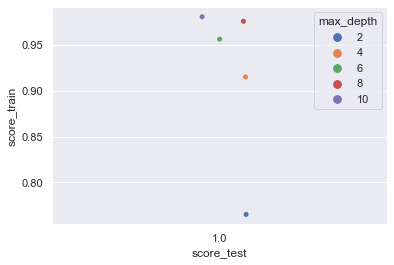

In [17]:
ax = sns.stripplot(x="score_test", y="score_train", data=df_scores, hue="max_depth")

What do these results tell you about the effect of the depth of the trees on the performance of the model?


In [18]:
# Your response here
"""Higher the max_depth, the higher the test_score"""

'Higher the max_depth, the higher the test_score'

### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10?

In [19]:
# Your response here
"""With more depth, you add more layers and so increase possible overfitting. Because more possibilities 
to get exactly the outcome you want to see. So with more depth, you get a higher variance and lower bias."""

'With more depth, you add more layers and so increase possible overfitting. Because more possibilities \nto get exactly the outcome you want to see. So with more depth, you get a higher variance and lower bias.'

### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Based on your previous results run your model and explain its performance.

#### Train the Random forest regressor model with the optimal value for max_depth

In [81]:
max_depth = 6

model = RandomForestRegressor(max_depth=max_depth)
model.fit(X_train, y_train)
score_train = model.score(X_train, y_train)
y_pred = model.predict(X_test)
score_test = model.score(X_test, y_pred)
print(score_train, score_test)

0.952097639237248 1.0


#### Use the mean absolute error (MAE) to calculate the performance of the model

In [21]:
#your code here
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

2.419734133743156

#### Use the root mean squared error (RMSE) to calculate the performance of the model

In [22]:
#your code here
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, y_pred))

3.366338131303848

#### Create a function that calculates  and returns the r2 score as performance metric

In [23]:
#your code here
def r2_score(y_test, y_pred):
    
    r2_score = sklearn.metrics.r2_score(y_test, y_pred)
    
    return r2_score


#### Calculate the r2 score of the model using the function defined above

In [24]:
#your code here

r2_score(y_test, y_pred)

0.8961062521654295

#### Bonus question
Read [this article](https://medium.com/human-in-a-machine-world/mae-and-rmse-which-metric-is-better-e60ac3bde13d) 
about the differences between MAE and RMSE. Do you think that one of the two types of error is more appropriate for this problem, and why?

In [25]:
#your answer here


### 4 - Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

#### Your response here
*How relevant today is data that was collected from 1978?* 
I would not go for data that is collected more than 30 years ago. A lot has changed since then, so other factors may actually be influencing the house price. It would be interesting to figure this out, but therefore you need also more recent data.

*Are the features present in the data sufficient to describe a home?*
I'm missing a lot of "house data": is there a garden or balcony, what's the surface area, exact location, etc. Those can all affect the house prices.

*Is the model robust enough to make consistent predictions?*
I found this quote online: "A model is considered to be robust if its output and forecasts are consistently accurate even if one or more of the input variables or assumptions are drastically changed due to unforeseen circumstances". I'm not sure this is the case for this model. The r2 score is 0.79 which is pretty good. I would like to test again though, with drastically changeing circumstances.

*Would data collected in an urban city like Boston be applicable in a rural city?*
Some features would probably have an similar effect on the house price. But also different features could play a role. Like distance to a supermarket or something like that. The model should at lease be checked again.

In [82]:
#paolo: good work!